# Homework 3 Part 1

## Mohammed Oubia

• Write a script that implement the GD algorithm, with the following structure:


In [1]:
def GDWithoutBackTracking(f, grad_f, x0,alpha, kmax, tolf, tolx):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    k=0
    cond1=True
    cond2=True
    while k < kmax and cond1 and cond2 :
        #and (np.linalg.norm(grad_f(xsol),2))>=tolf*np.linalg.norm(grad_f(x0),2) and np.linalg.norm(x[k]-x[k-1],2) >= tolx :
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        cond2=np.linalg.norm(x[k]-x[k-1],2) >= tolx
        cond1=np.linalg.norm(grad_f(xsol),2)>=tolf*np.linalg.norm(grad_f(x0),2)
        k+=1
    return x,k,f_val,grad,err

• On my website you can find a Python implementation of the backtracking algorithm for the automatic
selection of the step size. That function works as follows:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha *np.linalg.norm(grad_f(x),2) ** 2:
        alpha = tau * alpha
        if alpha < 1e-3:
            break
    return alpha

In [3]:
def GD(f, grad_f, x0, kmax, tolf, tolx):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    k=0
    alpha=0.01
    cond1=True
    cond2=True
    while k < kmax and cond1 and cond2 :
        #and (np.linalg.norm(grad_f(xsol),2))>=tolf*np.linalg.norm(grad_f(x0),2) and np.linalg.norm(x[k]-x[k-1],2) >= tolx :
        alpha=backtracking(f,grad_f,xsol)
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        cond2=np.linalg.norm(x[k]-x[k-1],2) >= tolx
        cond1=np.linalg.norm(grad_f(xsol),2)>=tolf*np.linalg.norm(grad_f(x0),2)
        k+=1
    return x,k,f_val,grad,err


• For each of the functions above, run the GD method with and without the backtracking, trying different
values for the step size α > 0 when you are not using backtracking. Observe the different behavior of
GD.

1. f : R
2 → R such that
f(x1, x2) = (x1 − 3)2 + (x2 − 1)2
for which the true optimum is x
∗ = (3, 1)T
.

- NOW WE DO A RUN WITH BACKTRACKING SO WE DO NOT NEED TO FIX ALPHA

[2.9999473  0.99998243]
82


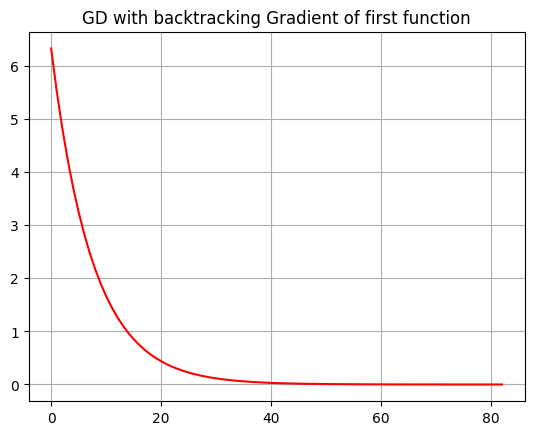

In [4]:
def f1(x):
    x1=x[0]
    x2=x[1]
    return (x1 - 3)**2 + (x2 - 1)**2
 
def grad_f1(x):
    x1=x[0]
    x2=x[1]
    return np.array((2*x1-6,2*x2-2))
x0=np.array((0,0))
xvec,k,f_val,grad,err=GD(f1,grad_f1,x0,1000,1e-5,1e-5)
print(xvec[-1])
print(k)
plt.plot(np.arange(0,k+1,1),err, color="red")
plt.grid()
plt.title("GD with backtracking Gradient of first function")
plt.show()

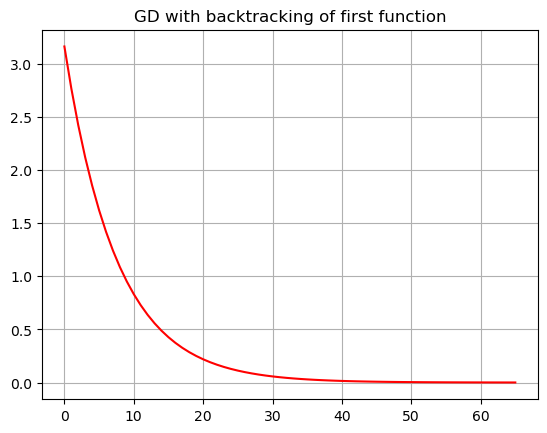

In [17]:
x0=np.array((0,0))
xvec,k,f_val,grad,err=GD(f1,grad_f1,x0,100,0.00001,0.0001)
truex0=np.array((3,1))
plt.plot(np.arange(0,k+1,1),[np.linalg.norm(i-truex0,2) for i in xvec ],color="red")
plt.grid()
plt.title("GD with backtracking of first function")
plt.show()

BACKTRACCKING WITH A FIXED ALPHA 1E-2


In [18]:
xvec,k,f_val,grad,err=GDWithoutBackTracking(f1, grad_f1, x0,1e-2, 10000,1e-5,1e-5)
print(xvec[-1])
print(k)

[2.99955157 0.99985052]
436


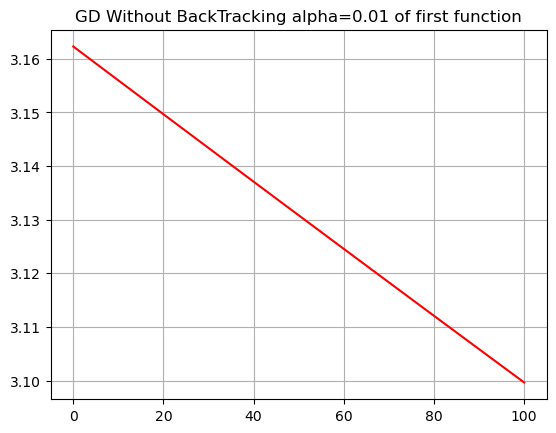

In [22]:
x0=np.array((0,0))
xvec,k,f_val,grad,err=GDWithoutBackTracking(f1,grad_f1,x0,1e-4,100,0.00001,0.0001)
truex0=np.array((3,1))
plt.plot(np.arange(0,k+1,1),[np.linalg.norm(i-truex0,2) for i in xvec ],color="red")
plt.grid()
plt.title("GD Without BackTracking alpha=0.01 of first function")
plt.show()

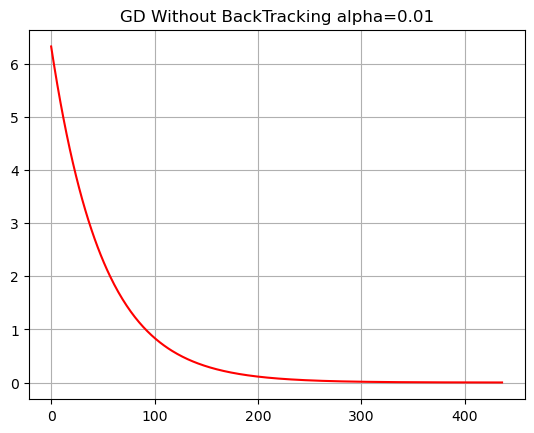

In [20]:
plt.plot(np.arange(0,k+1,1),err,color="red")
plt.grid()
plt.title("GD Without BackTracking alpha=0.01")
plt.show()

2. f : R
2 → R such that
f(x1, x2) = 10(x1 − 1)2 + (x2 − 2)2

GD with backtracking alpha is not fixed

In [25]:
def f2(x):
    x1=x[0]
    x2=x[1]
    return 10*(x1 - 1)**2 + (x2 - 2)**2
 
def grad_f2(x):
    x1=x[0]
    x2=x[1]
    return np.array((20*x1-20,2*x2-4))

In [26]:
x0=np.array((0,0))
xvec,k,f_val,grad,err=GD(f2,grad_f2,x0,10000,0.001,0.001)
print(xvec[-1])
print(k)

[1.         1.98998115]
45


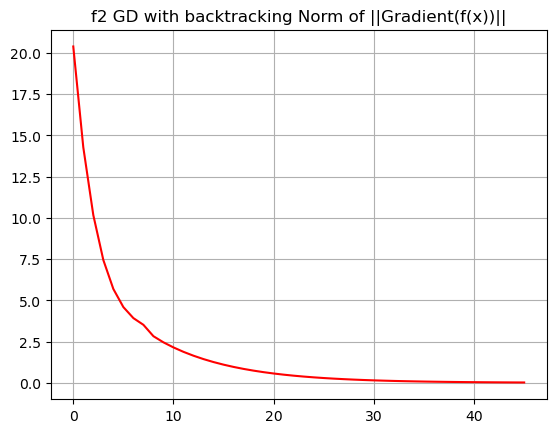

In [27]:
plt.plot(np.arange(0,k+1,1),err,color="red")
plt.grid()
plt.title("f2 GD with backtracking Norm of ||Gradient(f(x))||")
plt.show()

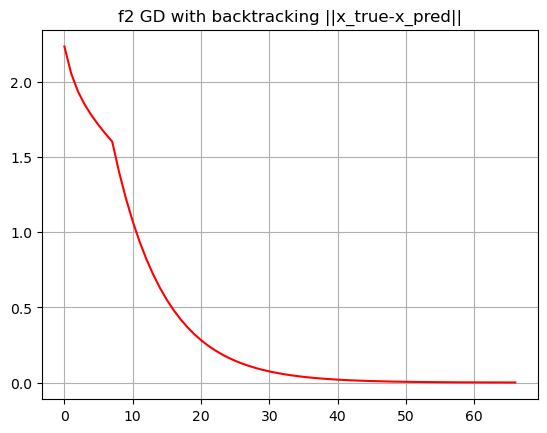

In [28]:
x0=np.array((0,0))
xvec,k,f_val,grad,err=GD(f2,grad_f2,x0,100,0.00001,0.0001)
truex0=np.array((1,2))
plt.plot(np.arange(0,k+1,1),[np.linalg.norm(i-truex0,2) for i in xvec ],color="red")
plt.grid()
plt.title("f2 GD with backtracking ||x_true-x_pred||")
plt.show()

BACKTRACCKING WITH A FIXED ALPHA 1e-2

In [30]:
x0=np.array((0,0))
xvec,k,f_val,grad,err=GDWithoutBackTracking(f2,grad_f2,x0,1e-2,10000,0.001,0.001)
print(xvec[-1])
print(k)

[1.         1.95237292]
185


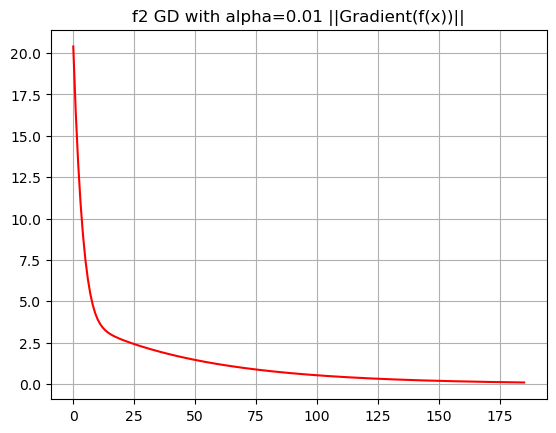

In [31]:
plt.plot(np.arange(0,k+1,1),err,color="red")
plt.grid()
plt.title("f2 GD with alpha=0.01 ||Gradient(f(x))||")
plt.show()

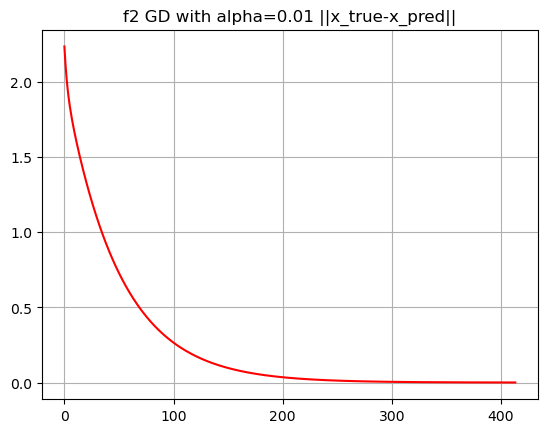

In [32]:
x0=np.array((0,0))
xvec,k,f_val,grad,err=GDWithoutBackTracking(f2,grad_f2,x0,1e-2,100000,1e-5,1e-5)
truex0=np.array((1,2))
plt.plot(np.arange(0,k+1,1),[np.linalg.norm(i-truex0,2) for i in xvec ],color="red")
plt.grid()
plt.title("f2 GD with alpha=0.01 ||x_true-x_pred||")
plt.show()

WITHOUT BACKTRACCKING WITH A FIXED ALPHA 1e-2

In [33]:
x0=np.array((0,0))
xvec,k,f_val,grad,err=GDWithoutBackTracking(f2,grad_f2,x0,1e-4,100000,1e-5,1e-5)
print(xvec[-1])
print(k)

[1.         1.95002447]
18445


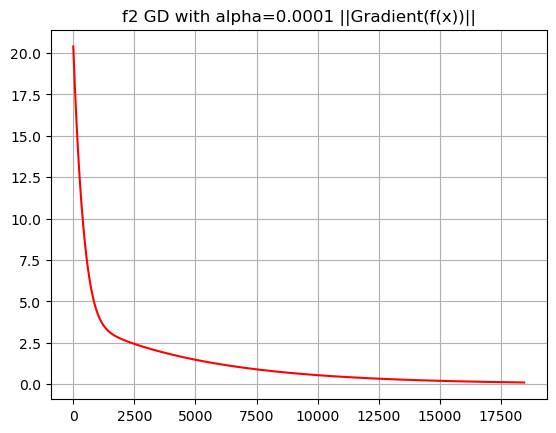

In [35]:
plt.plot(np.arange(0,k+1,1),err,color="red")
plt.grid()
plt.title("f2 GD with alpha=0.0001 ||Gradient(f(x))||")
plt.show()

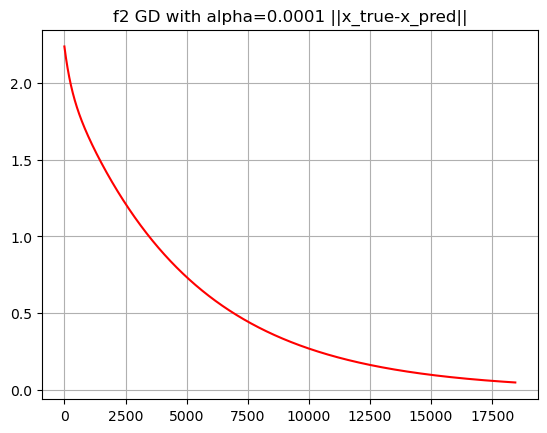

In [37]:
x0=np.array((0,0))
xvec,k,f_val,grad,err=GDWithoutBackTracking(f2,grad_f2,x0,1e-4,100000,1e-5,1e-5)
truex0=np.array((1,2))
plt.plot(np.arange(0,k+1,1),[np.linalg.norm(i-truex0,2) for i in xvec ],color="red")
plt.grid()
plt.title("f2 GD with alpha=0.0001 ||x_true-x_pred||")
plt.show()

3. f : R
n → R such that
f(x) = 1
2
||Ax − b||2
2
where A ∈ R
n×n is the Vandermonde matrix associated with the vector v ∈ R
n that contains
n equispaced values in the interval [0, 1], and b ∈ R
n is computed by first setting xtrue =
(1, 1, . . . , 1)T and then b = Axtrue. Try for different values of n (e.g. n = 5, 10, 15, . . .).

In [55]:
def f3(x):
    v=np.linspace(0,1,n)
    A=np.vander(v,increasing=True)
    b=A@np.ones(n)
    return 1/2 * (np.linalg.norm(A@x-b,2))**2
 
def grad_f3(x):
    v=np.linspace(0,1,n)
    A=np.vander(v,increasing=True)
    b=A@np.ones(n)
    return A@x -b

BACKTRACCKING WITH A FIXED ALPHA 1e-4

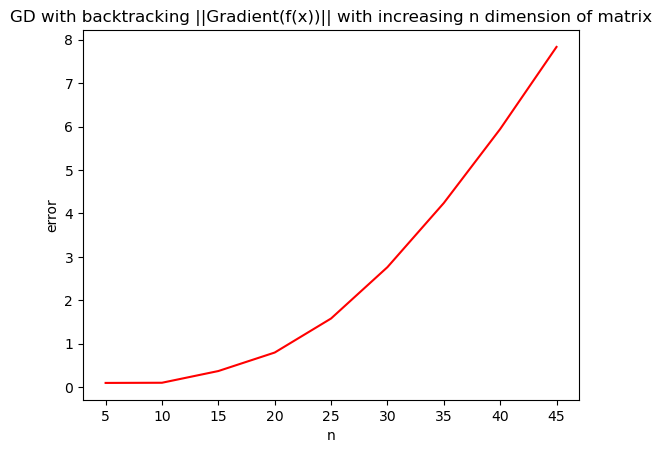

In [56]:
n=10
l=np.arange(5,50,5)
errorvec=[]
for i in l:
    n=i
    x0=np.zeros(n)
    xvec,k,f_val,grad,err=GD(f3,grad_f3,x0,10000,1e-4,1e-4)
    errorvec.append(err[-1])
plt.plot(l,errorvec,color="red")
plt.xlabel("n")
plt.ylabel("error")
plt.title("GD with backtracking ||Gradient(f(x))|| with increasing n dimension of matrix")
plt.show()

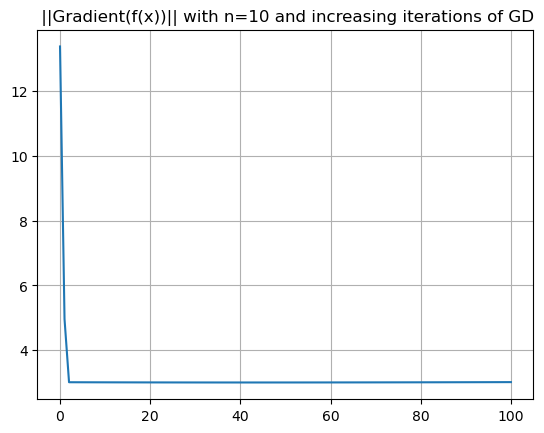

In [45]:
n=10
x0=np.zeros(n)
xvec,k,f_val,grad,err=GD(f3,grad_f3,x0,100,1e-4,1e-4)
plt.plot(np.arange(0,k+1,1),err)
plt.grid()
plt.title(" ||Gradient(f(x))|| with n=10 and increasing iterations of GD")
plt.show()

WITHOUT BACKTRACCKING with alpha=0.01

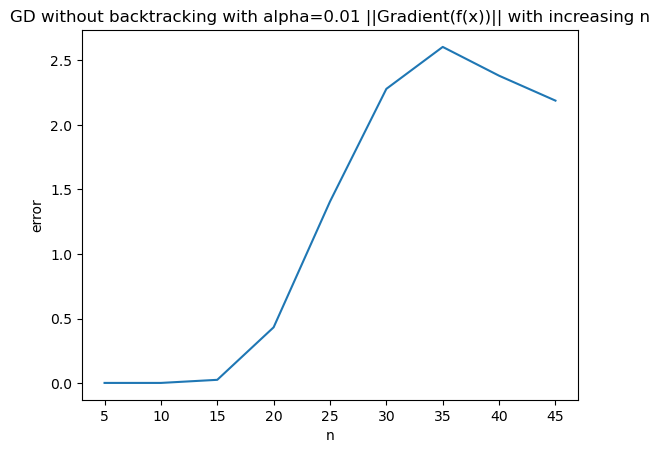

In [47]:
n=10
l=np.arange(5,50,5)
errorvec=[]
for i in l:
    n=i
    x0=np.zeros(n)
    xvec,k,f_val,grad,err=GDWithoutBackTracking(f3,grad_f3,x0,1e-2,10000,1e-5,1e-5)
    errorvec.append(err[-1])
plt.plot(l,errorvec)
plt.xlabel("n")
plt.ylabel("error")
plt.title("GD without backtracking with alpha=0.01 ||Gradient(f(x))|| with increasing n")
plt.show()

4. f : R
n → R such that
f(x) = 1
2
||Ax − b||2
2 +
λ
2
||x||2
2
where A and b are the same of the exercise above, while λ is a fixed value in the interval [0, 1].
Try different values for λ

In [48]:
def f4(x):
    v=np.linspace(0,1,n)
    A=np.vander(v,increasing=True)
    b=A@np.ones(n)
    return 1/2 * (np.linalg.norm(A@x-b,2))**2 + lam/2 * np.linalg.norm(x,2)**2
 
def grad_f4(x):
    v=np.linspace(0,1,n)
    A=np.vander(v,increasing=True)
    b=A@np.ones(n)
    return A@x -b +lam*x

WITH BACKTRACKING APLPHA IS 1e-4

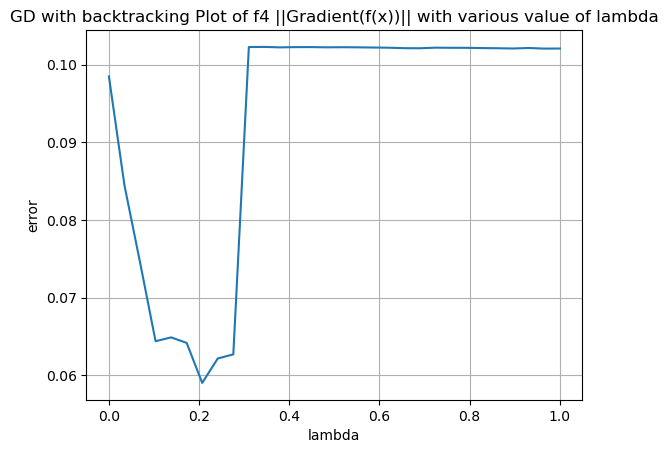

In [49]:
n=5
x0=np.zeros(n)
l=np.linspace(0,1,30)
errorvec=[]
for i in l:
    lam=i
    xvec,k,f_val,grad,err=GD(f4,grad_f4,x0,10000,1e-4,1e-4)
    errorvec.append(err[-1]) 
plt.plot(l,errorvec)
plt.title("GD with backtracking Plot of f4 ||Gradient(f(x))|| with various value of lambda")
plt.xlabel("lambda")
plt.ylabel("error")
plt.grid()
plt.show()

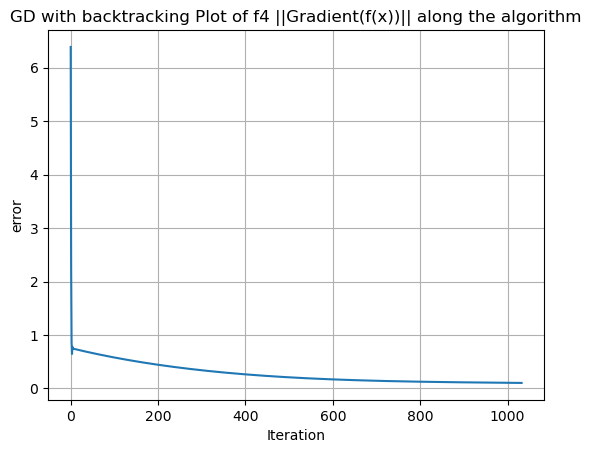

In [50]:
lam=0.5
n=5
x0=np.zeros(n)
xvec,k,f_val,grad,err=GD(f4,grad_f4,x0,10000,1e-4,1e-4)
plt.plot(np.arange(0,k+1,1),err)
plt.grid()
plt.title("GD with backtracking Plot of f4 ||Gradient(f(x))|| along the algorithm")
plt.xlabel("Iteration")
plt.ylabel("error")
plt.show()

WITHOUT BACKTRACKING ALPHA IS 1e-2

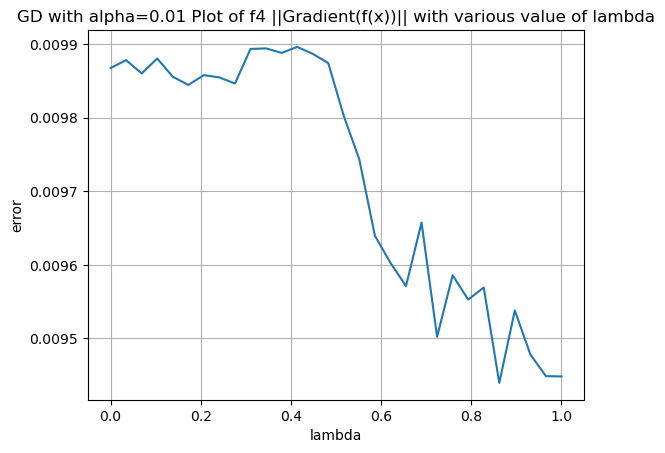

In [52]:
n=5
x0=np.zeros(n)
l=np.linspace(0,1,30)
errorvec=[]
for i in l:
    lam=i
    xvec,k,f_val,grad,err=GDWithoutBackTracking(f4,grad_f4,x0,1e-2,10000,1e-4,1e-4)
    errorvec.append(err[-1]) 
plt.plot(l,errorvec)
plt.title("GD with alpha=0.01 Plot of f4 ||Gradient(f(x))|| with various value of lambda")
plt.xlabel("lambda")
plt.ylabel("error")
plt.grid()
plt.show()

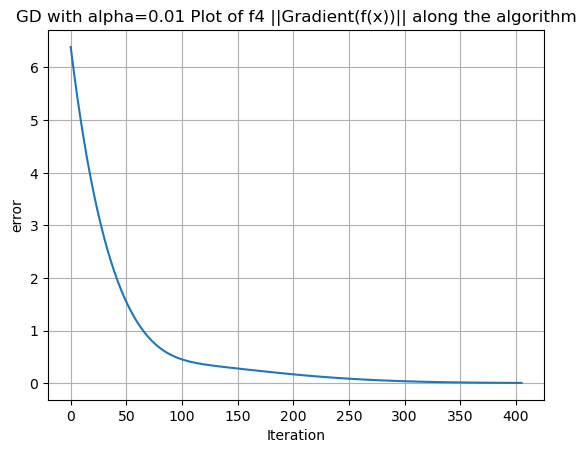

In [53]:
lam=0.5
n=5
x0=np.zeros(n)
xvec,k,f_val,grad,err=GDWithoutBackTracking(f4,grad_f4,x0,1e-2,10000,1e-4,1e-4)
plt.plot(np.arange(0,k+1,1),err)
plt.grid()
plt.title("GD with alpha=0.01 Plot of f4 ||Gradient(f(x))|| along the algorithm")
plt.xlabel("Iteration")
plt.ylabel("error")
plt.show()

WITHOUT BACKTRACKING ALPHA IS 1e-2

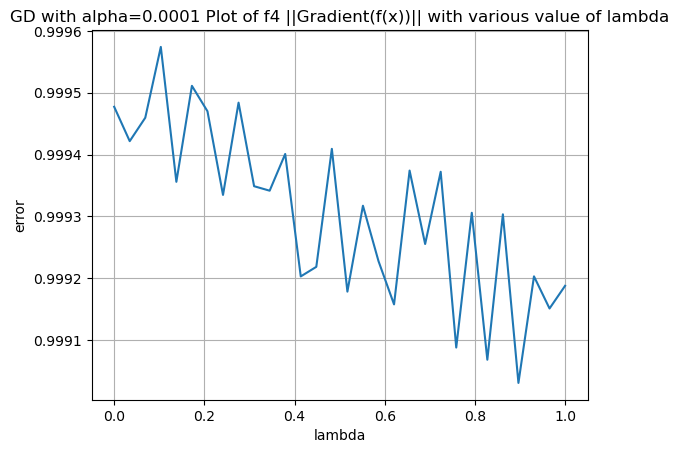

In [54]:
n=5
x0=np.zeros(n)
l=np.linspace(0,1,30)
errorvec=[]
for i in l:
    lam=i
    xvec,k,f_val,grad,err=GDWithoutBackTracking(f4,grad_f4,x0,1e-4,10000,1e-4,1e-4)
    errorvec.append(err[-1]) 
plt.plot(l,errorvec)
plt.title("GD with alpha=0.0001 Plot of f4 ||Gradient(f(x))|| with various value of lambda")
plt.xlabel("lambda")
plt.ylabel("error")
plt.grid()
plt.show()

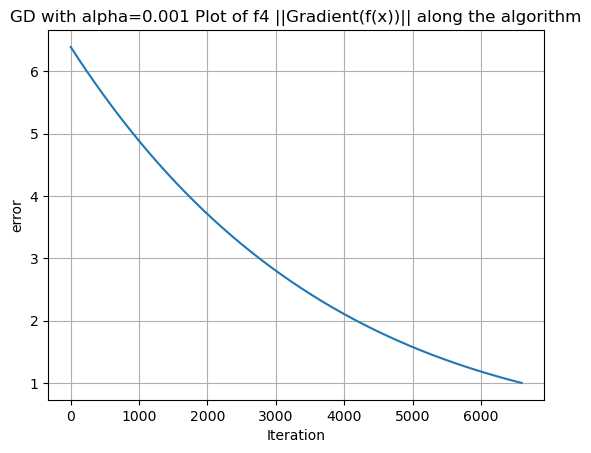

In [57]:
lam=0.5
n=5
x0=np.zeros(n)
xvec,k,f_val,grad,err=GDWithoutBackTracking(f4,grad_f4,x0,1e-4,10000,1e-4,1e-4)
plt.plot(np.arange(0,k+1,1),err)
plt.grid()
plt.title("GD with alpha=0.001 Plot of f4 ||Gradient(f(x))|| along the algorithm")
plt.xlabel("Iteration")
plt.ylabel("error")
plt.show()


5. f : R → R such that
f(x) = x
4 + x
3 − 2x
2 − 2x

In [58]:
def f5(x):
    return x**4+x**3-2*x**2-2*x
 
def grad_f5(x):
    return np.array((4*x**3+3*x**2-4*x-2))

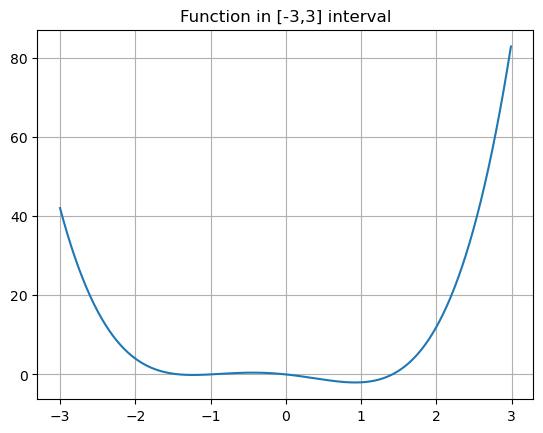

In [59]:
values=np.arange(-3,3,0.01)
plt.plot(np.arange(-3,3,0.01),f5(np.arange(-3,3,0.01)))
plt.title("Function in [-3,3] interval")
plt.grid()
plt.show()

We can see from the graph that the function is not convex having two global minima

WITH BACKTRACKING WITH ALPHA = 0.01

In [61]:
x0=np.array([-1.8])
xvec,k,f_val,grad,err=GD(f5,grad_f5,x0,10000,0.001,0.001)
print(xvec[-1])
print(k)
print(err[-1])
x0=np.array([0])
xvec,k,f_val,grad,err=GD(f5,grad_f5,x0,10000,0.001,0.001)
print(xvec[-1])
print(k)
print(err[-1])

[-1.23915352]
32
0.047769701650876684
[0.91866306]
25
0.041634116957341316


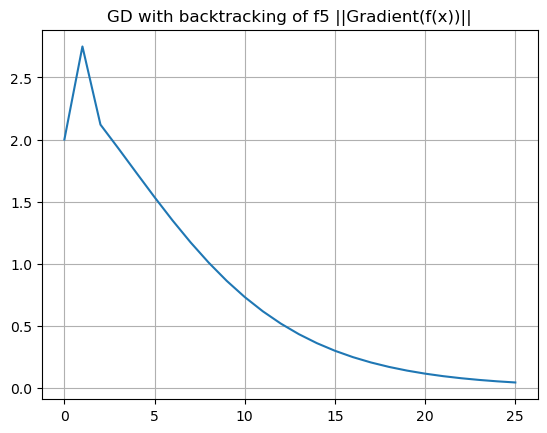

In [62]:
plt.plot(np.arange(0,k+1,1),err)
plt.grid()
plt.title("GD with backtracking of f5 ||Gradient(f(x))||")
plt.show()

We see that this function being non convex is problematic for the algorithm, and the results are very depending on starting point


WITHOUT BACKTRACKING ALPHA = 0.01

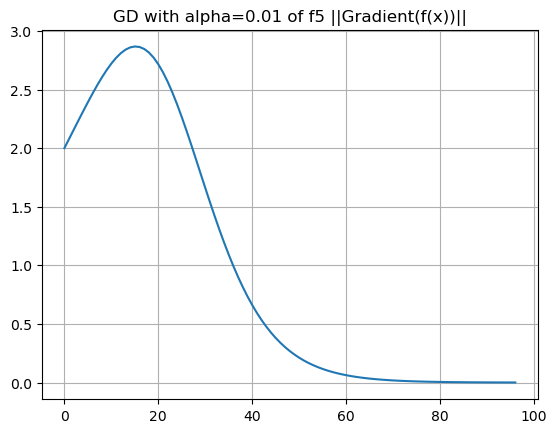

In [63]:
xvec,k,f_val,grad,err=GDWithoutBackTracking(f5,grad_f5,x0,1e-2,10000,1e-5,1e-5)
plt.plot(np.arange(0,k+1,1),err)
plt.grid()
plt.title("GD with alpha=0.01 of f5 ||Gradient(f(x))||")
plt.show()

WITHOUT BACKTRACKING ALPHA = 1E-4

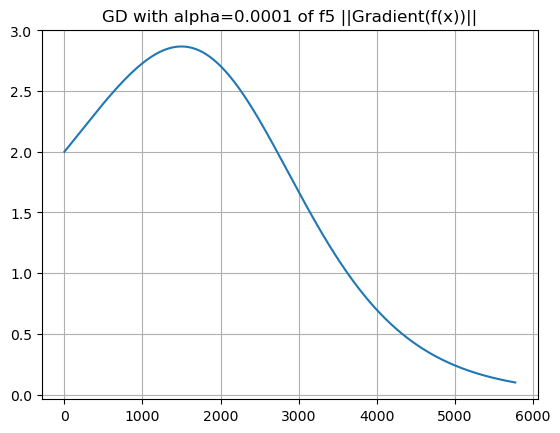

In [64]:
xvec,k,f_val,grad,err=GDWithoutBackTracking(f5,grad_f5,x0,1e-4,10000,1e-5,1e-5)
plt.plot(np.arange(0,k+1,1),err)
plt.grid()
plt.title("GD with alpha=0.0001 of f5 ||Gradient(f(x))||")
plt.show()


## End